In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/D Drive/Me/AY 2023-2024/Application Based Analytics/Market Basket Analysis/Big Basket Data.csv')
df.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


In [3]:
df.shape

(62141, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [5]:
#No. of unique orders
df.Order.nunique()

8387

In [6]:
#No. of unique items
df.Description.nunique()

216

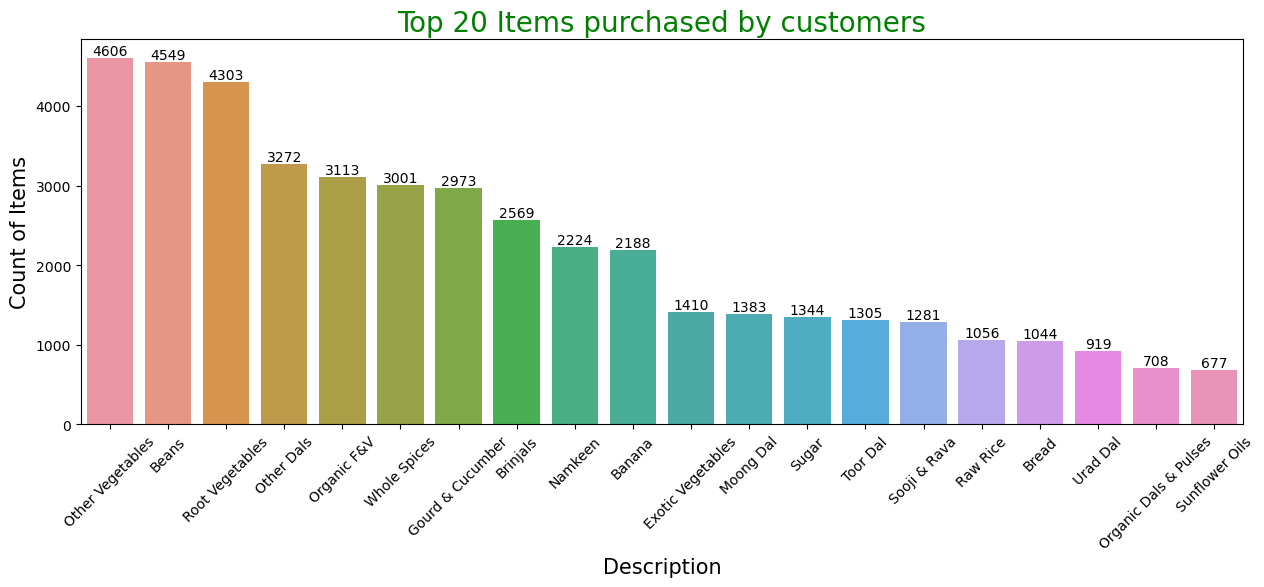

In [7]:
#Data Visualization
plt.figure(figsize=(15,5))
p=sns.barplot(x = df.Description.value_counts().head(20).index, y = df.Description.value_counts().head(20).values)
plt.xlabel('Description', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
p.bar_label(p.containers[0])    #Show data labels
plt.show()

# df.Description.value_counts().index returns the count of all unique values in the given index in descending order

# Apriori Algorithm

In [8]:
#mlxtend is a library containing Apriori Algorithm

In [9]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [10]:
from mlxtend.frequent_patterns import association_rules, apriori
#The frequent pattern algorithm is a popular method for mining frequent itemsets in a dataset

In [11]:
#Items ordered together in one order
basket = df.groupby(['Order', 'Description'])['Description'].count().reset_index(name ='Count')   #Reset Index to keep top rows of each group
basket

,Order,Description,Count
0,6422558,Boiled Rice,1
1,6422558,Health Drinks,2
2,6422558,Mosquito Repellent,1
3,6422558,Other Rice Products,1
4,6422558,Raw Rice,1
...,...,...,...
50153,8388492,Other Rice Products,1
50154,8388492,Raw Peanuts,1
50155,8388492,Root Vegetables,1
50156,8388492,Sunflower Oils,1


In [12]:
#Making a mxn matrix where m=transaction and n=items and each row represents whether the item was in the transaction or not
#The fillna() method replaces the NULL values with a specified value

my_basket = basket.pivot_table(index='Order', columns='Description', values='Count').fillna(0)
my_basket

Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6422636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6423338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6423534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6423959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8387967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8388196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 8387 Rows as there are 8387 unique orders
# 216 columns as there are 216 unique items

In [13]:
#Making a function which returns 0 or 1
#0 means item was not in that transaction, 1 means item was present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

#Applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)   #The applymap script function is used for mapping the output of an expression to a previously loaded mapping table 
my_basket_sets

Description,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,Avalakki / Poha,Ayurvedic,Ayurvedic Food,Baby Care Accessories,Baby Cereal,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6422636,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6423338,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6423534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6423959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8387967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8388196,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#Using the 'apriori algorithm' with min_support=0.01 (i.e., the itemset is available in at least 1% of the transactions)

frequent_items = apriori(my_basket_sets.astype('bool'), min_support = 0.01, use_colnames=True)
frequent_items

,support,itemsets
0,0.062001,(Almonds)
1,0.016096,(Aluminium Foil & Cling Wrap)
2,0.077024,(Avalakki / Poha)
3,0.260284,(Banana)
4,0.028973,(Basmati Rice)
...,...,...
1855,0.011208,"(Other Dals, Whole Spices, Toor Dal, Urad Dal,..."
1856,0.010612,"(Other Vegetables, Other Dals, Whole Spices, T..."
1857,0.012996,"(Other Vegetables, Brinjals, Beans, Root Veget..."
1858,0.014427,"(Other Vegetables, Other Dals, Brinjals, Beans..."


In [15]:
#Now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Almonds),(Banana),0.062001,0.260284,0.019196,0.309615,1.189530,0.003059,1.071455,0.169864
1,(Banana),(Almonds),0.260284,0.062001,0.019196,0.073752,1.189530,0.003059,1.012687,0.215396
2,(Almonds),(Beans),0.062001,0.399070,0.026112,0.421154,1.055338,0.001369,1.038152,0.055903
3,(Beans),(Almonds),0.399070,0.062001,0.026112,0.065432,1.055338,0.001369,1.003671,0.087259
4,(Almonds),(Cashews),0.062001,0.062120,0.021700,0.350000,5.634261,0.017849,1.442892,0.876882
...,...,...,...,...,...,...,...,...,...,...
15015,(Brinjals),"(Other Vegetables, Beans, Whole Spices, Root V...",0.272445,0.022773,0.012042,0.044201,1.940924,0.005838,1.022419,0.666316
15016,(Beans),"(Other Vegetables, Brinjals, Whole Spices, Roo...",0.399070,0.016693,0.012042,0.030176,1.807775,0.005381,1.013903,0.743570
15017,(Whole Spices),"(Other Vegetables, Brinjals, Beans, Root Veget...",0.203768,0.046739,0.012042,0.059099,1.264445,0.002519,1.013136,0.262661
15018,(Root Vegetables),"(Other Vegetables, Brinjals, Beans, Whole Spic...",0.414093,0.017766,0.012042,0.029081,1.636956,0.004686,1.011655,0.664116


In [16]:
#Export Output to Excel using ExcelWriter
with pd.ExcelWriter('D:/D Drive/Me/AY 2023-2024/Application Based Analytics/Market Basket Analysis/Big Basket Output.xlsx') as excel_writer:
    rules.to_excel(excel_writer, sheet_name='Output', index=False)